In [1]:
# Open and Inspect File
import xarray as xr

fn = "C:/Users/jenna/OneDrive/Desktop/Fall 2025/Energy Meterology/Final Proj/data/Historical_NearSurface_CMIP_City.nc"

# lazy open (good default)
ds = xr.open_dataset(fn)

# quick overview
print(ds)
print("Variables:", list(ds.data_vars))
print("Coords:", ds.coords)
print(ds.tas.attrs)        # check units, long_name, etc.


<xarray.Dataset>
Dimensions:  (time: 5840)
Coordinates:
  * time     (time) datetime64[ns] 1999-01-01 1999-01-02 ... 2014-12-31
Data variables:
    lat      (time) float64 ...
    lon      (time) float64 ...
    tas      (time) float32 ...
    year     (time) int32 ...
    tas_C    (time) float32 ...
Variables: ['lat', 'lon', 'tas', 'year', 'tas_C']
Coords: Coordinates:
  * time     (time) datetime64[ns] 1999-01-01 1999-01-02 ... 2014-12-31
{}


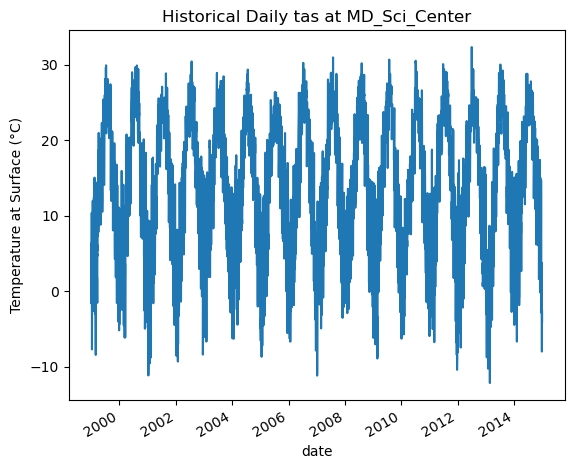

In [2]:
import matplotlib.pyplot as plt
ts = ds.tas_C.sel()
ts = ts.sel()

ts.plot.line(x='time')
plt.ylabel("Temperature at Surface (°C)")
plt.xlabel("date")
plt.title("Historical Daily tas at MD_Sci_Center")
plt.show()

In [3]:
fn2 = "C:/Users/jenna/OneDrive/Desktop/Fall 2025/Energy Meterology/Final Proj/data/Historical_NearSurface_BWI.nc"

# lazy open (good default)
ds2 = xr.open_dataset(fn2)



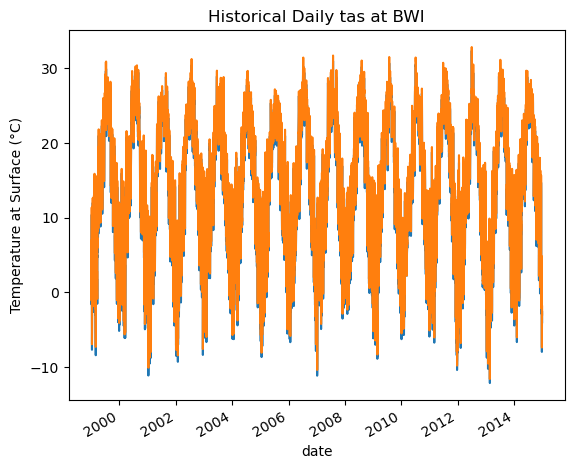

In [4]:
import matplotlib.pyplot as plt
ts2 = ds2.tas_C.sel()
ts2 = ts2.sel()


ts.plot.line(x='time')
ts2.plot.line(x='time')
plt.ylabel("Temperature at Surface (°C)")
plt.xlabel("date")
plt.title("Historical Daily tas at BWI")
plt.show()

In [5]:
import pandas as pd
from scipy.stats import pearsonr

# Convert ts and ts2 times to date-only
ts_dates = [pd.Timestamp(str(t)).date() for t in ts['time'].values]
ts2_dates = [pd.Timestamp(str(t)).date() for t in ts2['time'].values]

ts_df = pd.DataFrame({'DATE': ts_dates, 'tas_C': ts.values})
ts2_df = pd.DataFrame({'DATE': ts2_dates, 'tas2_C': ts2.values})

merged = pd.merge(ts_df, ts2_df, on='DATE', how='inner')

r, p_value = pearsonr(merged['tas_C'], merged['tas2_C'])
print(f"Pearson r: {r:.4f}")
print(f"P-value: {p_value:.4e}")

Pearson r: 0.9997
P-value: 0.0000e+00
